# 라이브러리 불러오기

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [8]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\James\AppData\Local\Temp/ipykernel_6360/3064774803.py:39: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


# "서울시 생필품 농수축산물 가격정보"불러오기
* 서울시 물가모니터가 주1회 자치구별 전통시장과 대형마트에 나가 농수축산물 16개 품목을 조사하고 그 가격을 공개하는 정보입니다.
* 출처 : https://data.seoul.go.kr/dataList/OA-1170/S/1/datasetView.do

In [9]:
dir_path = "./data"
df = pd.DataFrame()

for (root, directories, files) in os.walk(dir_path):
    for file in files:
        df_by_year = pd.read_csv(os.path.join(root, file), encoding="cp949")
        df = pd.concat([df, df_by_year])

df.columns = ["일련번호", "시장/마트번호", "시장/마트이름", "품목번호", '품목이름', "실판매규격", "가격(원)",  "년도-월", "비고", "시장유형구분코드", "시장유형구분이름", "자치구코드", "자치구이름", "점검일자"] 


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence

In [26]:
df_1 = pd.read_csv('data/생필품 농수축산물 가격 정보(2021년).csv', encoding="cp949")
df_2=pd.read_csv('data/생필품 농수축산물 가격 정보(2020년).csv', encoding="cp949")
df_3=pd.read_csv('data/생필품 농수축산물 가격 정보(2019년).csv', encoding="cp949")
df_4=pd.read_csv('data/생필품 농수축산물 가격 정보(2018년).csv', encoding="cp949")
df = pd.concat([df_1,df_2,df_3,df_4])

# 데이터 통합 및 결측치, 유일값 확인.

* 각 데이터 프레임의 컬럼명 통일 및 통합.

In [27]:
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21


In [28]:
df.shape

(341240, 14)

* 데이터 형식 확인

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341240 entries, 0 to 20396
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               341240 non-null  int64 
 1   시장/마트 번호           341240 non-null  int64 
 2   시장/마트 이름           341240 non-null  object
 3   품목 번호              341240 non-null  int64 
 4   품목 이름              341184 non-null  object
 5   실판매규격              341240 non-null  object
 6   가격(원)              341240 non-null  int64 
 7   년도-월               341240 non-null  object
 8   비고                 267501 non-null  object
 9   시장유형 구분(시장/마트) 코드  341240 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  341240 non-null  object
 11  자치구 코드             341240 non-null  int64 
 12  자치구 이름             341240 non-null  object
 13  점검일자               341240 non-null  object
dtypes: int64(6), object(8)
memory usage: 39.1+ MB


* 중복 제거 및 결측치 확인.

In [30]:
df = df.drop_duplicates()
df.shape

(341240, 14)

In [31]:
df.isnull().sum()

일련번호                     0
시장/마트 번호                 0
시장/마트 이름                 0
품목 번호                    0
품목 이름                   56
실판매규격                    0
가격(원)                    0
년도-월                     0
비고                   73739
시장유형 구분(시장/마트) 코드        0
시장유형 구분(시장/마트) 이름        0
자치구 코드                   0
자치구 이름                   0
점검일자                     0
dtype: int64

In [32]:
df = df.fillna("내용없음")

* 유일값 확인

In [33]:
df.nunique()

일련번호                 341240
시장/마트 번호                107
시장/마트 이름                155
품목 번호                    96
품목 이름                    89
실판매규격                  7870
가격(원)                  3507
년도-월                     47
비고                    28292
시장유형 구분(시장/마트) 코드         2
시장유형 구분(시장/마트) 이름         2
자치구 코드                   25
자치구 이름                   25
점검일자                    110
dtype: int64

In [34]:
df["일련번호"].unique(), len(df["일련번호"].unique())

(array([1636107, 1636108, 1636109, ..., 1192247, 1192248, 1192249],
       dtype=int64),
 341240)

In [35]:
df["시장/마트이름"].unique(), len(df["시장/마트이름"].unique())

KeyError: '시장/마트이름'

In [ ]:
df["품목번호"].unique(), len(df["품목번호"].unique())

In [36]:
item_list = df["품목이름"].unique()
item_list, len(df["품목이름"].unique())

KeyError: '품목이름'

In [37]:
category = {
    "분류없음": ['내용없음'],
    "돼지고기": ['돼지고기', '삼겹살'],
    "닭고기": ['닭고기'],
    "쇠고기": ['쇠고기'],
    "고등어": ['고등어'],
    "오징어": ['오징어'],
    "사과": ['사과', '부사'],
    "배추": ['배추'],
    "달걀": ['달걀'],
    "양파": ['양파'],
    "갈치": ['갈치'],
    "명태": ['명태'],
    "동태": ['동태'],
    "조기": ['조기'],
    "오이": ['오이'],
    "호박": ['호박'],
    "상추": ['상추'],
    "배":['배'],
    "무": ['무'],
    "쌀": ['쌀'],
}  

def do_categorizing(df, category):
    category_list = []  
    for item in df["품목이름"]:
        is_category = False
        for key, value in category.items():
                for v in value:
                    if not is_category and v in item:
                        category_list.append(key)
                        is_category = True
    
    df["분류"] = category_list
    return df
                
do_categorizing(df, category)

KeyError: '품목이름'

In [38]:
df["실판매규격"].unique(), len(df["실판매규격"].unique())

(array(['1개 (300g)', '1개 (600g)', '1포기(2kg)', ..., '1포기 (2.2kg)', '1개(특)',
        '1마(42cm)'], dtype=object),
 7870)

In [39]:
df["가격(원)"].unique(), len(df["가격(원)"].unique())

(array([ 1598,  1590,  3990, ...,  8570,  2531, 14520], dtype=int64), 3507)

In [40]:
df["년도-월"].unique(), len(df["년도-월"].unique())

(array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
        '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07',
        '2020-06', '2020-05', '2020-04', '2020-02', '2020-01', '2019-12',
        '2019-11', '2019-10', '2019-09', '2019-08', '2019-07', '2019-06',
        '2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12',
        '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06',
        '2018-05', '2018-04', '2018-03', '2018-02', '2018-01'],
       dtype=object),
 47)

In [41]:
df["비고"].unique(), len(df["비고"].unique())

(array(['국내산,부사', '국내산,신고', '국내산', ..., '청송7개8900원', '국내산3개5500원',
        '100g3590선진'], dtype=object),
 28292)

In [42]:
df["시장유형구분코드"].unique(), len(df["시장유형구분코드"].unique())

KeyError: '시장유형구분코드'

In [43]:
df["시장유형구분이름"].unique(), len(df["시장유형구분이름"].unique())

KeyError: '시장유형구분이름'

In [44]:
df["자치구코드"].unique(), len(df["자치구코드"].unique())

KeyError: '자치구코드'

In [45]:
df["자치구이름"].unique(), len(df["자치구이름"].unique())

KeyError: '자치구이름'

# 점검일자 Datetime으로 변환

In [46]:
df['점검일자'].head(1)

0    2021-01-21
Name: 점검일자, dtype: object

In [47]:
df['점검일자'] = pd.to_datetime(df['점검일자']) # convert to datetime

* 연도,월,일,요일 컬럼 만들기

In [48]:
df["연도"] = df['점검일자'].dt.year
df.head(1)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21,2021


In [49]:
df["월"] = df["점검일자"].dt.month
df["일"] = df["점검일자"].dt.day
df["요일"] = df["점검일자"].dt.dayofweek
df.head(1)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도,월,일,요일
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3


* 연도월 컬럼 만들기

In [50]:
df["연도월"] = df['점검일자'].astype(str).str[:7]
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도,월,일,요일,연도월
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20392,1192245,112,애경백화점,320,달걀(30개),30개,6900,2018-01,판란,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01
20393,1192246,112,애경백화점,136,"조기(국산,생물)",1마리[15cm],8900,2018-01,국내산 (백조기),2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01
20394,1192247,112,애경백화점,315,"명태(45cm,수입산)",1마리,4900,2018-01,러시아,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01
20395,1192248,112,애경백화점,254,"오징어(생물,국산)",1마리[15cm],7900,2018-01,내용없음,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01


*요일 한글로 변환

In [51]:
dayofweek = "월화수목금토일"
def find_dayofweek(day_no):
    return dayofweek[day_no]
df["요일명"] = df['요일'].map(find_dayofweek)
df.head(1)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도,월,일,요일,연도월,요일명
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목


In [52]:
df['요일명'].value_counts() # 요일별 점검 갯수

목    243085
월     87870
일      4879
수      4641
금       765
Name: 요일명, dtype: int64

In [53]:
df['연도'].value_counts() # 연도별 점검 갯수(2020년이 가장 많음)

2020    117452
2019    113492
2021     89899
2018     20397
Name: 연도, dtype: int64

In [54]:
df['가격(원)'].mean() # 가격의 평균은 12979.95245281913

12979.95245281913

In [88]:
df['품목 이름'].describe() # 달걀(10개) 품목이 제일 많음

count      341240
unique         89
top       달걀(10개)
freq        19481
Name: 품목 이름, dtype: object

In [ ]:
b = df['시장유형구분이름']
b.value_counts(normalize = True) * 100 # 전통시장과 마트의 비율

# 연도월 별 조사 수 시각화

<AxesSubplot:>

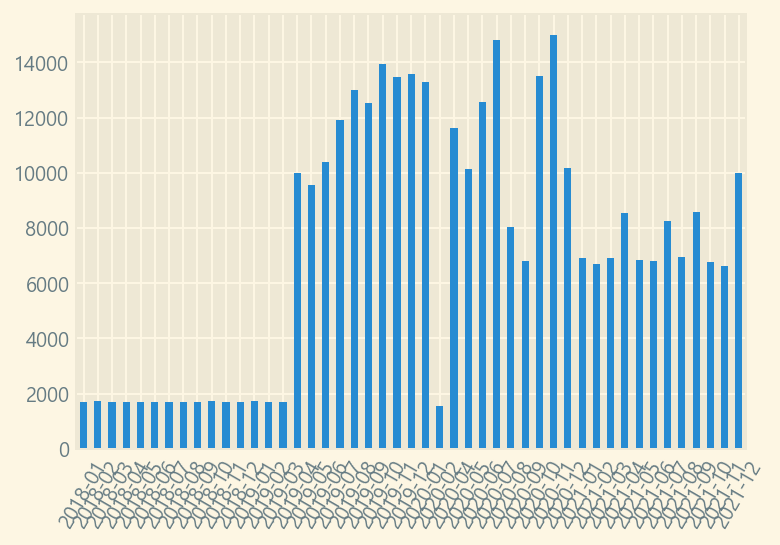

In [89]:
year_month = df['연도월'].value_counts().sort_index()
year_month
year_month.plot(kind='bar',rot=60)

* 요일 별 조사 수 시각화

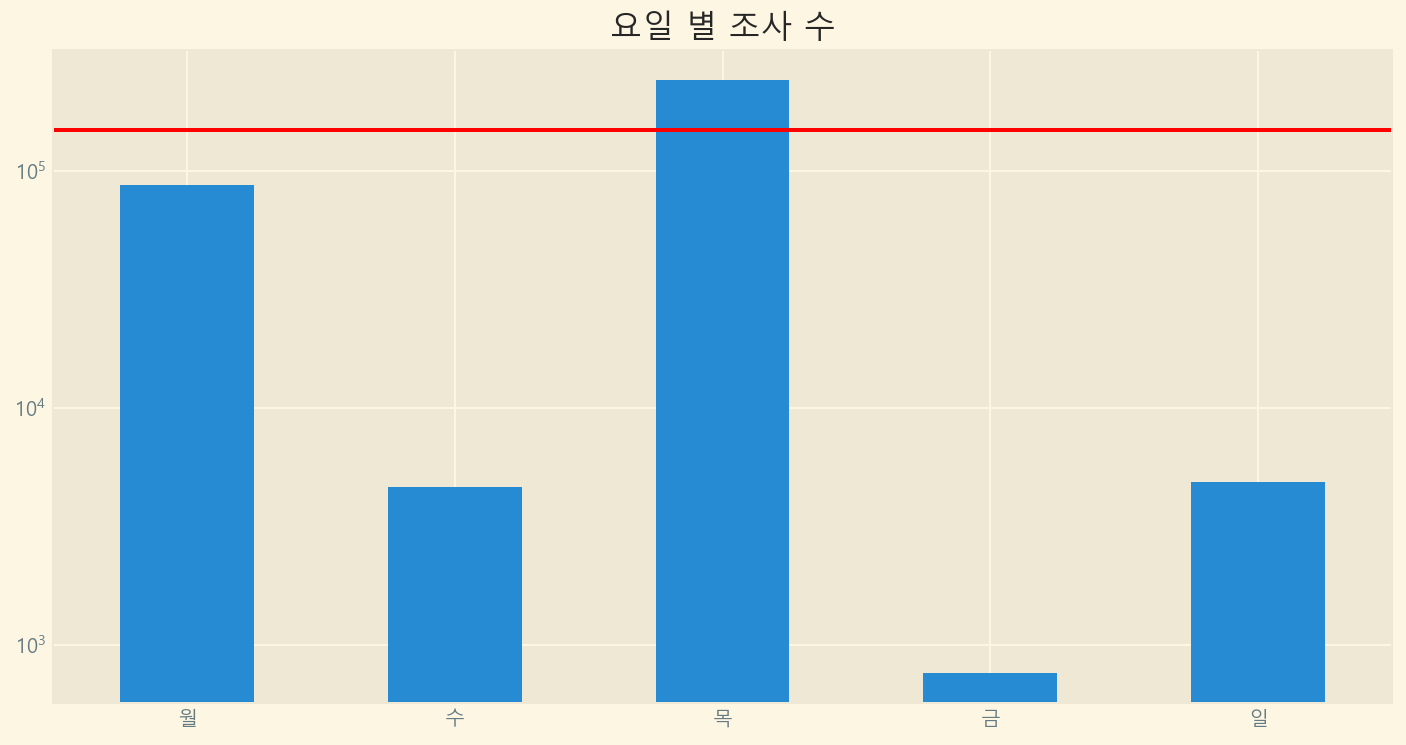

금       765
목    243085
수      4641
월     87870
일      4879
Name: 요일명, dtype: int64

In [90]:
weekday_count = df['요일명'].value_counts().sort_index()
weekday_list = [x for x in '월수목금일']

weekday_count[weekday_list].plot(kind='bar',rot=0,title = '요일 별 조사 수',figsize=(12,6))
plt.axhline(150000,c='r',linestyle='solid')
plt.style.use('fivethirtyeight')
plt.yscale('log')
plt.show()
weekday_count

# 구 별 농수산물 평균 가격


In [59]:
df['가격(원)'] # df의 모든 가격 출력

0         1598
1         1590
2         3990
3         1990
4          990
         ...  
20392     6900
20393     8900
20394     4900
20395     7900
20396    13900
Name: 가격(원), Length: 341240, dtype: int64

In [74]:
gu_price = df.groupby('자치구 이름')['가격(원)'].mean() # 중구의 평균가가 지나치게 높음
gu_price

자치구 이름
강남구       7430.373444
강동구       5350.739993
강북구       5448.257770
강서구       5602.870959
관악구       5928.916758
광진구       5699.571019
구로구       5268.071553
금천구       5339.536841
노원구       6609.085389
도봉구       5167.011736
동대문구      5420.166957
동작구       5457.244444
마포구       5131.259118
서대문구      6313.139037
서초구       7142.473548
성동구       5083.447883
성북구       6119.600798
송파구       6010.737309
양천구       9991.665233
영등포구      6142.716221
용산구       5306.766791
은평구       5262.666499
종로구       5635.838381
중구      121554.188657
중랑구       5324.613855
Name: 가격(원), dtype: float64

In [75]:
junggu_price = df[df['자치구 이름']=='중구']['가격(원)']
junggu_price

51       4000
52       8000
53       2980
54       3980
55       4580
         ... 
18828    5290
18829    3900
18830    2100
18831    4850
18832    2980
Name: 가격(원), Length: 20752, dtype: int64

In [76]:
junggu_price.max() # Abnormal value

2394023940

In [77]:
def findsecond(arr):
    second = first = -float('inf') 

    for n in arr:
        if n > first:
            second = first
            first = n
        elif second < n < first:
            second = n
    return second
findsecond(junggu_price) # Since the second largest value seems like the others, we can hypothesize that the largest value could be possibly an outlier.

112480

In [78]:
df[df['가격(원)'] == 2394023940] # The amount of 2394023940 can not be an appropriate price for 돼지고기(생삼겹살) even in 롯데백화점. So we can conclude that is an outlier.

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도,월,일,요일,연도월,요일명
55890,1688423,56,롯데백화점,99,돼지고기(생삼겹살),600g,2394023940,2021-08,"국내산,돈육삼겹살",2,대형마트,140000,중구,2021-08-26,2021,8,26,3,2021-08,목


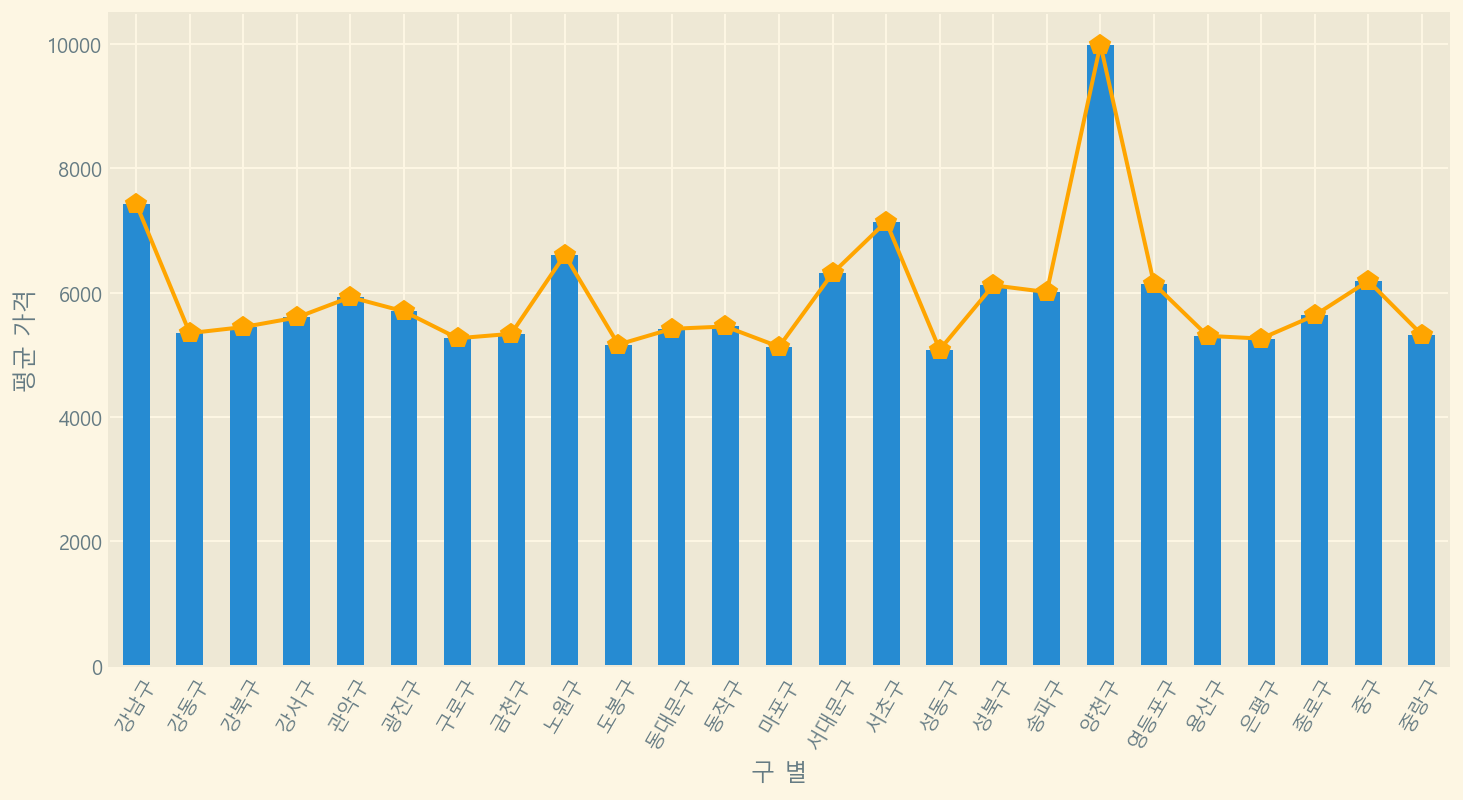

In [80]:
removed_df = df.drop(55890)
removed_df[removed_df['가격(원)'] == 2394023940]
udt_junggu_price = removed_df.groupby('자치구 이름')['가격(원)'].mean()
plt.style.use('Solarize_Light2')
udt_junggu_price.plot.bar(rot=60,figsize = (12,6))
plt.plot(udt_junggu_price, color = 'orange',scalex=True,marker = 'p',markersize=10) 
plt.xlabel('구 별')
plt.ylabel('평균 가격')
plt.show()

* 이상치 제거 후 시각화

In [81]:
grt_10_values = df[df['가격(원)']<= 10].index
grt_10_df = df.drop(grt_10_values)
grt_10_df



,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,연도,월,일,요일,연도월,요일명
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21,2021,1,21,3,2021-01,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20392,1192245,112,애경백화점,320,달걀(30개),30개,6900,2018-01,판란,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01,수
20393,1192246,112,애경백화점,136,"조기(국산,생물)",1마리[15cm],8900,2018-01,국내산 (백조기),2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01,수
20394,1192247,112,애경백화점,315,"명태(45cm,수입산)",1마리,4900,2018-01,러시아,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01,수
20395,1192248,112,애경백화점,254,"오징어(생물,국산)",1마리[15cm],7900,2018-01,내용없음,2,대형마트,530000,구로구,2018-01-31,2018,1,31,2,2018-01,수


In [83]:
grt_10_df[grt_10_df['품목 이름'].str.contains('한우')]['가격(원)'].max() # 아무리 한우라도 합당하지 않음

288200

In [84]:
grt_10_df['가격(원)'].sort_values(ascending=False).head(30) # 가격 높은순 30개(10만원을 넘는 금액은 이상치라고 판단)

55890     2394023940
14118       35002980
25931       34902990
25965         403890
35102         310000
92710         288200
66140         260520
13264         210000
115361        210000
15267         133600
48610         122800
28357         120000
22826         117600
20117         112480
81897         107802
108447        106820
7088          100000
36202          99800
41090          96000
65124          95880
71507          95880
68391          95880
73271          95340
105887         93333
73287          91680
65108          90720
71475          90720
66412          90720
68359          90720
71523          90000
Name: 가격(원), dtype: int64

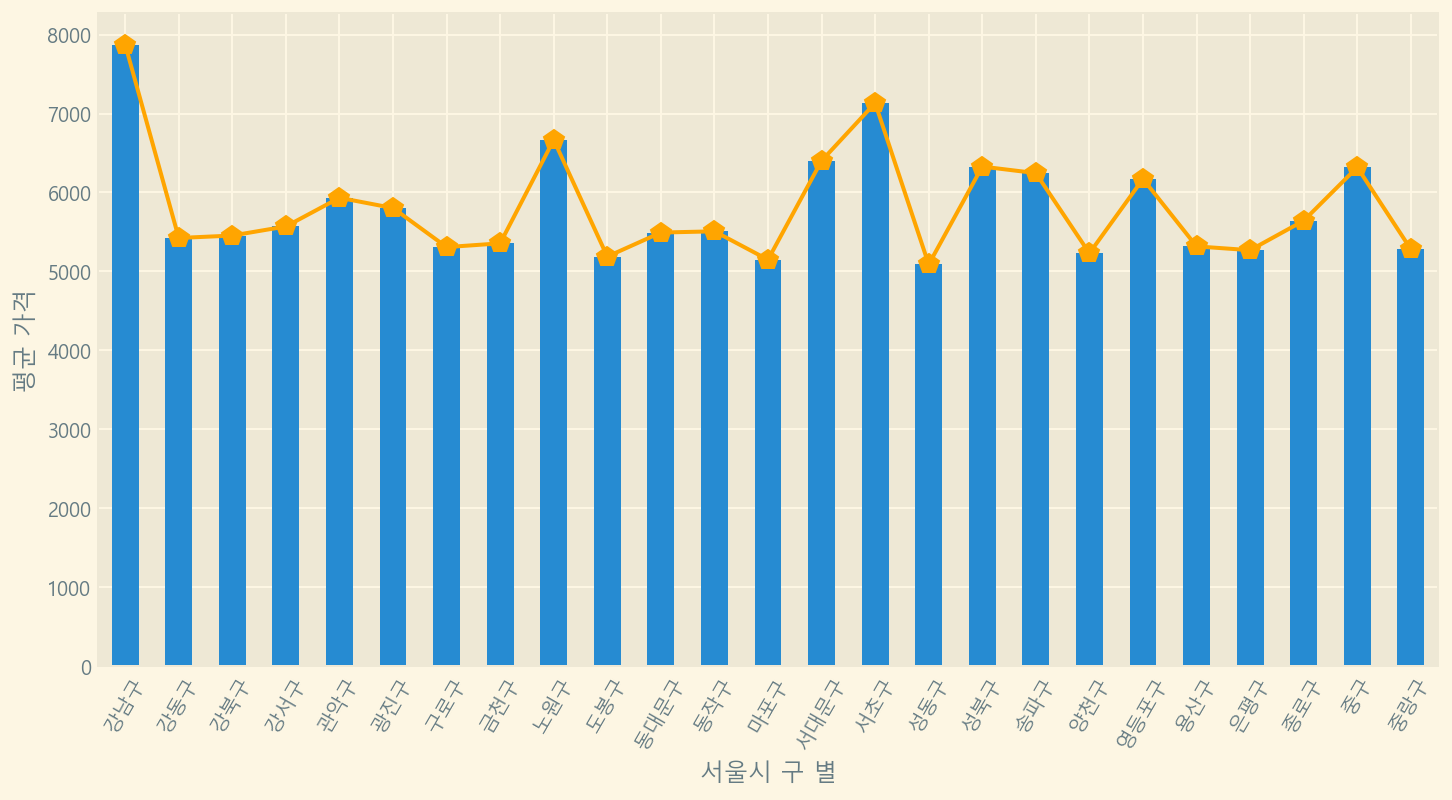

In [85]:
price_over_100000 = grt_10_df[grt_10_df['가격(원)'] >=100000].index # 가격이 10만원이 넘는 값 제거
price_df = grt_10_df.drop(price_over_100000) # 기존의 가격이 10원 이상인 값들에서 10만원 이상 제거
final_price_df = price_df.groupby('자치구 이름')['가격(원)'].mean() # 가격이 10원 이상인 값과 10만원이 넘는 값 모두 제거
plt.style.use('Solarize_Light2')
final_price_df.plot.bar(rot=60,figsize = (12,6))
plt.plot(final_price_df, color = 'orange',scalex=True,marker = 'p',markersize=10) 
plt.xlabel('서울시 구 별')
plt.ylabel('평균 가격')
plt.show()
# 전체 기간의 각 구 별 농수산물의 평균가격


* 시장 마트별

In [86]:
df[df["자치구 이름"] == "관악구"]["시장/마트이름"].value_counts()

KeyError: '시장/마트이름'

In [87]:
df[df["자치구이름"] == "관악구"]["시장/마트번호"].value_counts()

KeyError: '자치구이름'

In [72]:
# 이름은 다를 수 있으나, 시장/마트번호는 정확하구나.
gu_list = df["자치구이름"].unique().tolist()
gu_store_number_list = []
for gu in gu_list:
    gu_store_number_list.append(df[df["자치구이름"] == gu]["시장/마트번호"].nunique())
gu_store_number_list

KeyError: '자치구이름'

In [ ]:
df_gu_store = pd.DataFrame([gu_list,gu_store_number_list]).transpose()
df_gu_store.columns = ["자치구이름","시장/마트수"]
df_gu_store

* 이상치 제거

In [ ]:
df_f = df[((df["가격(원)"] <= 100000) & (df["가격(원)"] >= 10) )]
# 0원 제거, 10만원 이상 제거
df_f

# 달걀 품목 분석

## 달걀 연도월 분석

In [ ]:
df_go = df_f[df_f["분류"].str.contains("달걀")][["품목이름", "가격(원)" ,"자치구이름", "연도월", "연도"]]
df_go

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도월"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도월', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "달걀 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

In [ ]:
_ = pd.pivot_table(df_go,index="연도월",columns="품목이름",values="가격(원)").plot(subplots=True,figsize=(12,8))

## 달걀 연도 분석

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "달걀 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

In [ ]:
_ = pd.pivot_table(df_go,index="연도",columns="품목이름",values="가격(원)").plot(subplots=True,figsize=(12,8))

# 사과 품목 분석

## 사과 연도월 분석

In [ ]:
df_go = df_f[df_f["분류"].str.contains("사과")][["품목이름", "가격(원)" ,"자치구이름", "연도월", "연도"]]
df_go

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도월"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도월', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "사과 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

In [ ]:
_ = pd.pivot_table(df_go,index="연도월",columns="품목이름",values="가격(원)").plot(subplots=True,figsize=(12,8))

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "사과 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

# 돼지고기 품목 분석

## 돼지고기 연도월 분석

In [ ]:
df_go = df_f[df_f["분류"].str.contains("돼지고기")][["품목이름", "가격(원)" ,"자치구이름", "연도월", "연도"]]
df_go

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도월"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도월', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "돼지고기 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

In [ ]:
_ = pd.pivot_table(df_go,index="연도월",columns="품목이름",values="가격(원)").plot(subplots=True,figsize=(12,8))

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "돼지고기 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

## 소고기 연도월 분석

In [ ]:
df_go = df_f[df_f["분류"].str.contains("쇠고기")][["품목이름", "가격(원)" ,"자치구이름", "연도월", "연도"]]
df_go

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도월"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도월', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "소고기 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

In [ ]:
_ = pd.pivot_table(df_go,index="연도월",columns="품목이름",values="가격(원)").plot(subplots=True,figsize=(12,8))

In [ ]:
df_go_mean = df_go.groupby(["자치구이름","연도"])[["가격(원)"]].mean()
df_go_mean

In [ ]:
_ = pd.pivot_table(df_go_mean.reset_index(),
               index='연도', columns='자치구이름', values='가격(원)'
              ).plot(subplots=False, figsize=(12,12), title = "소고기 가격 평균 추이")
plt.legend(bbox_to_anchor=(1.0, 1.0),ncol=2,frameon=True, shadow=True)

# 쇠고기 600 그램 데이터 추출 및 이상치 확인

In [ ]:
df_600 = df[df["실판매규격"].str.contains('600g')][["분류", "년도-월", "가격(원)", "비고"]]
df_beef = df_600[df_600["분류"] == "쇠고기"]
df_beef = df_beef[df_beef["비고"].str.contains('한우|국산|국내산')][["년도-월", "가격(원)", "분류"]]
px.scatter(df_beef, x="년도-월", y="가격(원)", color="가격(원)", title="쇠고기[국산] (600g) 월별 가격 그래프")

# 쇠고기 600그램 이상치 제거

In [ ]:
df_beef = df_beef.drop(df_beef[df_beef["가격(원)"] > 70000].index)
df_beef = df_beef.drop(df_beef[df_beef["가격(원)"] < 20000].index)
px.scatter(df_beef, x="년도-월", y="가격(원)", color="가격(원)", title="쇠고기[국산] (600g) 월별 가격 그래프")

# 쇠고기 600그램 연도-월 그래프

In [ ]:
df_beef_mean = df_beef.groupby(["년도-월"]).mean()
px.line(df_beef_mean, x=df_beef_mean.index, y="가격(원)", title="쇠고기[국산] (600g) 월별 가격 그래프")

# 돼지고기 600 그램 데이터 추출 및 이상치 확인

In [ ]:
df_600 = df[df["실판매규격"].str.contains('600g')][["분류", "년도-월", "가격(원)", "비고"]]
df_fork = df_600[df_600["분류"] == "돼지고기"]
df_fork = df_fork[df_fork["비고"].str.contains("국산|도드람|국내산|한돈")][["년도-월", "가격(원)", "분류"]]
px.scatter(df_fork,x="년도-월", y="가격(원)", title="돼지고기[국산] (600g) 월별 가격 그래프", color="가격(원)")

# 돼지고기 600그램 이상치 재확인

In [ ]:
df_fork = df_fork.drop(df_fork[df_fork["가격(원)"] == 2394023940].index)
px.scatter(df_fork,x="년도-월", y="가격(원)", title="돼지고기[국산] (600g) 월별 가격 그래프", color="가격(원)")

# 돼지고기 600그램 이상치 제거

In [ ]:
df_fork = df_fork.drop(df_fork[df_fork["가격(원)"] > 25000].index)
df_fork = df_fork.drop(df_fork[df_fork["가격(원)"] < 10000].index)
px.scatter(df_fork,x="년도-월", y="가격(원)", title="돼지고기[국산] (600g) 월별 가격 그래프", color="가격(원)")

# 돼지고기 연도-월 가격 그래프

In [ ]:
df_fork_mean = df_fork.groupby(["년도-월"]).mean()
px.line(df_fork_mean, x=df_fork_mean.index, y="가격(원)", title="돼지고기[국산] (600g) 월별 가격 그래프")

# 닭고기 1kg 데이터 추출 및 이상치 확인

In [ ]:
df_kg = df[df["실판매규격"].str.contains('1kg')][["분류", "년도-월", "가격(원)", "비고"]]
df_chicken = df_kg[df_kg["분류"] == "닭고기"]
df_chicken = df_chicken[df_chicken["비고"].str.contains("국산|토종|하림|국내산")][["년도-월", "가격(원)", "분류"]]
px.scatter(df_chicken,x="년도-월", y="가격(원)", title="닭고기[국산] (1kg) 월별 가격 그래프", color="가격(원)")

# 닭고기 1kg 이상치 제거 및 재확인

In [ ]:
df_chicken = df_chicken.drop(df_chicken[df_chicken["가격(원)"] > 65000].index)
px.scatter(df_chicken,x="년도-월", y="가격(원)", title="닭고기[국산] (1kg) 월별 가격 그래프", color="가격(원)")

# 닭고기 이상치 제거

In [ ]:
df_chicken = df_chicken.drop(df_chicken[df_chicken["가격(원)"] > 10000].index)
df_chicken = df_chicken.drop(df_chicken[df_chicken["가격(원)"] < 5000].index)
px.scatter(df_chicken,x="년도-월", y="가격(원)", title="닭고기[국산] (1kg) 월별 가격 그래프", color="가격(원)")

# 닭고기 1kg 연도-월 그래프

In [ ]:
df_chicken_mean = df_chicken.groupby(["년도-월"]).mean()
px.line(df_chicken_mean, title="닭고기[국산] (1kg) 월별 가격 그래프")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(df_fork[["가격(원)"]])
df_fork["가격(원)"] = scaler.transform(df_fork[["가격(원)"]])
scaler.fit(df_beef[["가격(원)"]])
df_beef["가격(원)"] = scaler.transform(df_beef[["가격(원)"]])
scaler.fit(df_chicken[["가격(원)"]])
df_chicken["가격(원)"] =  scaler.transform(df_chicken[["가격(원)"]])

In [ ]:
df_all = pd.concat([df_fork, df_beef, df_chicken])

In [ ]:
px.scatter(df_all, x="년도-월", y="가격(원)", color='분류')

In [ ]:
df_all_mean = df_all.groupby(["년도-월", "분류"]).mean("가격(원)")
df_all_mean = df_all_mean.reset_index()
df_all_mean

In [ ]:
px.line(df_all_mean, x="년도-월", y="가격(원)", color="분류")

# 소비자물가상승률 비교

In [ ]:
df = pd.read_excel('물가_연도별.xlsx')
df

In [ ]:
df = df.dropna()
df1 = df[1:3]
df1
df2 = df1.transpose()
df2.columns = ["소비자물가상승률", "식료품 · 비주류음료"]
df3 = df2[8:]
df3.rename(index={'Unnamed: 8':'2018', 'Unnamed: 9':'2019', 'Unnamed: 10':'2020', 'Unnamed: 11':'2021'}, inplace=True)
df3

In [ ]:
import platform

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
# 시각화를 위한 폰트설정

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당

# 그래프 스타일 설정
plt.style.use("ggplot")
# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [ ]:
df3.plot(title="연도별 물가 상승률", figsize=(12, 4))